In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from lib_new.io_lib import *
from lib_new.average_waveforms import *
from lib_new.ped_lib import *

In [3]:
# path ="/media/rodrigoa/2Gb/data/SBND_XA_PDE/SBND_XA_VIS/joython/"
path="/media/rodrigoa/DiscoDuro/SBND_XA_VIS/joython/"

for run in range(15,16):
    if run==3:continue # Rodrigo forgot one run :D
    Run_props=open_run_properties(run,"new_macros/Runs_list.xlsx")
    run_path=path+"run"+str(run).zfill(2)+"/";

    compress=False
    
    
    # One channel at a time: 
    # loading all ch waveforms might demmand too much memory, 
    # remember to always delete between runs to prevent overloading)

    # for ch in Run_props["Channels"]:
    for ch in [0]:

        ADC=open_run_var(run_path,"RawADC",[ch],compressed=compress)
        Pedestal_vars=open_run_var(run_path,"Pedestal_vars",[ch],compressed=compress)
        ADC=do_run_things((ADC,Pedestal_vars,Run_props["Polarity"]),substract_Pedestal)
        
        Peak_vars=do_run_things(ADC,compute_Peak)

        Avg_wvf=do_run_things((ADC,Peak_vars),compute_AverageWaveforms)
        # # Average_waveform
        # del Pedestal_vars, ADC
        
        # plt.plot(Avg_wvf[0])
        # Avg_wvf=do_run_things((ADC,{0:"shifted"},{0:c}),Average_waveform)
        # plt.plot(Avg_wvf[0])

FileNotFoundError: [Errno 2] No such file or directory: '/media/rodrigoa/DiscoDuro/SBND_XA_VIS/joython/run15/Pedestal_vars_ch0.npz'

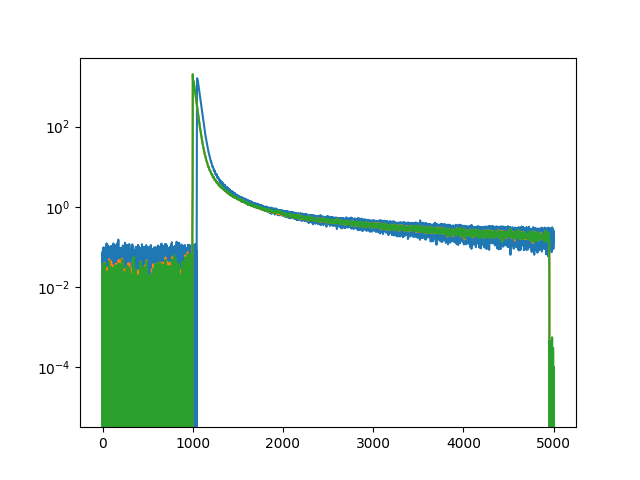

In [5]:
%matplotlib widget
for key in Avg_wvf[0]:
    plt.plot(Avg_wvf[0][key])
    plt.yscale("log")

# plt.plot(ADC[0][2])